<a href="https://colab.research.google.com/github/sharathc21/HackerRankPrograms/blob/main/KerasMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # from tensorflow.examples.tutorials.mnist import inut_data
# # mnist = input_data.read_data_sets("MNIST_data/", one_hot= True)
# import tensorflow as tf
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time


In [4]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label = "Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()


In [5]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
print("Training sample no. : ", x_train.shape[0], y_train.shape)
print("Testing sample no. : ", x_test.shape[0], y_test[0])

Training sample no. :  60000 (60000,)
Testing sample no. :  10000 7


In [7]:
x_train =x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [8]:
print(len(x_train[0]))
print(x_train[0])

784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   

In [9]:
x_train= x_train/ 255
x_test = x_test / 255

In [10]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print("Class label for train images", y_train[0])

Class label for train images 5


In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
print("after conversion of output to vector:", y_train[0]) # number is 5, thats why 5th position alone will be 1

after conversion of output to vector: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [15]:
output_dim =10
input_dim =x_train.shape[1]

batch_size =128
nb_epoch =20

In [16]:
model=Sequential()

model.add(Dense(output_dim, input_dim=input_dim , activation='softmax'))

In [17]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics= ['accuracy'])

In [18]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 3ms/step - loss: 1.2744 - accuracy: 0.6972 - val_loss: 0.8066 - val_accuracy: 0.8367
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7144 - accuracy: 0.8421 - val_loss: 0.6041 - val_accuracy: 0.8640
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5861 - accuracy: 0.8600 - val_loss: 0.5234 - val_accuracy: 0.8730
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5245 - accuracy: 0.8699 - val_loss: 0.4780 - val_accuracy: 0.8797
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4870 - accuracy: 0.8759 - val_loss: 0.4490 - val_accuracy: 0.8850
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4613 - accuracy: 0.8802 - val_loss: 0.4274 - val_accuracy: 0.8905
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4421 - accuracy: 0.8841 - val_loss: 0.4119 - val_accuracy: 0.8930
Epoch 

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.33502429723739624
Test Accuracy: 0.9082000255584717


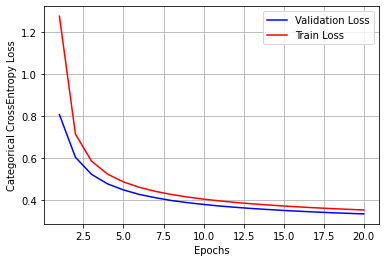

In [20]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Categorical CrossEntropy Loss')

x= list(range(1, nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


MLP + Sigmoid Activation + SGD Optimizer
 

In [21]:
model_sigmoid= Sequential()

model_sigmoid.add(Dense(512, activation = 'sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))


model_sigmoid.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history_sigmoid= model_sigmoid.fit(x_train, y_train, batch_size=120, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 2.2632 - accuracy: 0.2285 - val_loss: 2.2152 - val_accuracy: 0.3308
Epoch 2/20
500/500 [==============================] - 2s 3ms/step - loss: 2.1659 - accuracy: 0.4626 - val_loss: 2.1029 - val_accuracy: 0.5325
Epoch 3/20
500/500 [==============================] - 2s 4ms/step - loss: 2.0318 - accuracy: 0.5900 - val_loss: 1.9383 - val_accuracy: 0.6372
Epoch 4/20
500/500 [==============================] - 2s 5ms/step - loss: 1.8386 - accuracy: 0.6592 - val_loss: 1.7112 - val_accuracy: 0.6941
Epoch 5/20
500/500 [==============================] - 2s 3ms/step - loss: 1.5994 - accuracy: 0.7055 - val_loss: 1.4617 - val_accuracy: 0.7478
Epoch 6/20
500/500 [==============================] - 2s 3ms/step - loss: 1.3635 - accuracy: 0.7446 - val_loss: 1.2401 - val_accuracy: 0.7847
Epoch 7/20
500/500 [==============================] - 2s 3ms/step - loss: 1.1643 - accuracy: 0.7750 - val_loss: 1.0605 - val_accuracy: 0.7904
Epoch 

In [23]:
score = model_sigmoid.evaluate(x_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.43896323442459106
Test Accuracy: 0.8826000094413757


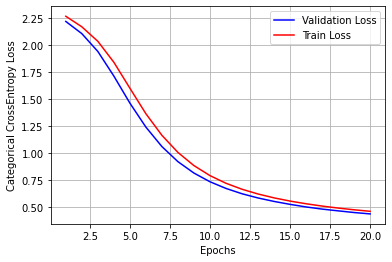

In [24]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Categorical CrossEntropy Loss')

x= list(range(1, nb_epoch+1))

vy = history_sigmoid.history['val_loss']
ty = history_sigmoid.history['loss']
plt_dynamic(x, vy, ty, ax)


<function matplotlib.pyplot.show(*args, **kw)>

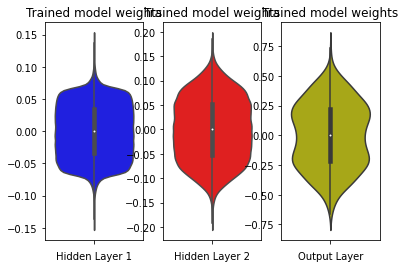

In [25]:
w_after = model_sigmoid.get_weights()

h1_w =w_after[0].flatten().reshape(-1,1)
h2_w =w_after[2].flatten().reshape(-1,1)
out_w =w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")

plt.subplot(1,3,1)
plt.title("Trained model weights")
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
plt.title("Trained model weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
plt.title("Trained model weights")
ax = sns.violinplot(y=out_w, color='y')
plt.xlabel('Output Layer')
plt.show

MLP + Sigmoid Activation + ADAM Optimizer

In [26]:
model_sigmoid= Sequential()

model_sigmoid.add(Dense(512, activation = 'sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))


model_sigmoid.summary()

model_sigmoid.compile(optimizer='ADAM', loss='categorical_crossentropy', metrics=['accuracy'])

history_sigmoid= model_sigmoid.fit(x_train, y_train, batch_size=120, epochs=20, verbose=1, validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 2s 4ms/step - loss: 0.5281 - accuracy: 0.8598 - val_loss: 0.2554 - val_accuracy: 0.9260
Epoch 2/20
500/500 [==============================] - 2s 3ms/step - loss: 0.2177 - accuracy: 0.9359 - val_loss: 0.1927 - val_accuracy: 0.9443
Epoch 3/20
500/500 [========

Test Score: 0.07274271547794342
Test Accuracy: 0.980400025844574


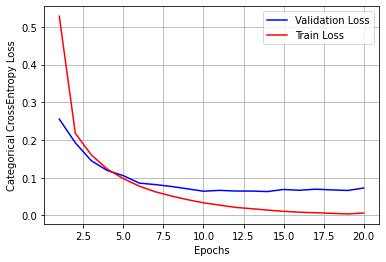

In [27]:
score = model_sigmoid.evaluate(x_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Categorical CrossEntropy Loss')

x= list(range(1, nb_epoch+1))

vy = history_sigmoid.history['val_loss']
ty = history_sigmoid.history['loss']
plt_dynamic(x, vy, ty, ax)


<function matplotlib.pyplot.show(*args, **kw)>

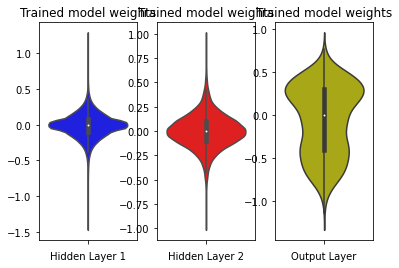

In [28]:
w_after = model_sigmoid.get_weights()

h1_w =w_after[0].flatten().reshape(-1,1)
h2_w =w_after[2].flatten().reshape(-1,1)
out_w =w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")

plt.subplot(1,3,1)
plt.title("Trained model weights")
ax = sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
plt.title("Trained model weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
plt.title("Trained model weights")
ax = sns.violinplot(y=out_w, color='y')
plt.xlabel('Output Layer')
plt.show

MLP + Relu Activation + ADAM Optimizer

In [29]:
model_relu= Sequential()

model_relu.add(Dense(512, activation = 'relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev =0.125, seed=None)))
model_relu.add(Dense(128, activation='relu',  kernel_initializer=RandomNormal(mean=0.0, stddev =0.125, seed=None)))
model_relu.add(Dense(output_dim, activation='softmax'))


model_relu.summary()

model_relu.compile(optimizer='ADAM', loss='categorical_crossentropy', metrics=['accuracy'])

history_relu = model_relu.fit(x_train, y_train, batch_size=120, epochs=20, verbose=1, validation_data=(x_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 4s 6ms/step - loss: 0.2553 - accuracy: 0.9242 - val_loss: 0.1238 - val_accuracy: 0.9609
Epoch 2/20
500/500 [==============================] - 2s 5ms/step - loss: 0.0896 - accuracy: 0.9727 - val_loss: 0.1033 - val_accuracy: 0.9675
Epoch 3/20
500/500 [========

Test Score: 0.10328225046396255
Test Accuracy: 0.9769999980926514


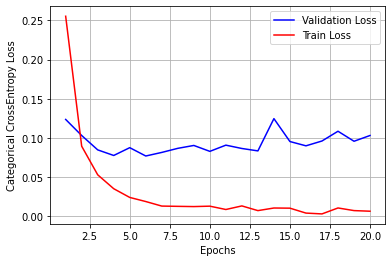

In [30]:
score = model_relu.evaluate(x_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Categorical CrossEntropy Loss')

x= list(range(1, nb_epoch+1))

vy = history_relu.history['val_loss']
ty = history_relu.history['loss']
plt_dynamic(x, vy, ty, ax)

In [37]:
history_relu.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

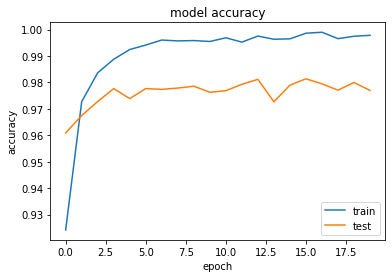

In [39]:
# summarize history for accuracy
plt.plot(history_relu.history['accuracy'])
plt.plot(history_relu.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

MLP + Relu + Batch Normalization + Adam Optimizer


In [40]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
model_batch= Sequential()

model_batch.add(Dense(512, activation = 'relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev =0.125, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(128, activation='relu',  kernel_initializer=RandomNormal(mean=0.0, stddev =0.125, seed=None)))
model_batch.add(BatchNormalization())
model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

model_batch.compile(optimizer='ADAM', loss='categorical_crossentropy', metrics=['accuracy'])

history_batch = model_batch.fit(x_train, y_train, batch_size=120, epochs=20, verbose=1, validation_data=(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 471,434
Trainable params: 470,154
Non-tr

Test Score: 0.08072373270988464
Test Accuracy: 0.9799000024795532


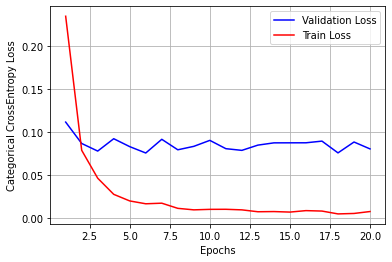

In [41]:
score = model_batch.evaluate(x_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Categorical CrossEntropy Loss')

x= list(range(1, nb_epoch+1))

vy = history_batch.history['val_loss']
ty = history_batch.history['loss']
plt_dynamic(x, vy, ty, ax)

In [42]:
def plt_dynamic_acc(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Accuracy")
  ax.plot(x, ty, 'r', label = "Val Accuracy")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

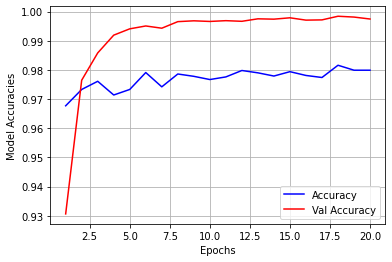

In [43]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Model Accuracies')

x= list(range(1, nb_epoch+1))

vy = history_batch.history['val_accuracy']
ty = history_batch.history['accuracy']
plt_dynamic_acc(x, vy, ty, ax)

In [45]:

from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.layers import Dropout
model_batch_drop= Sequential()

model_batch_drop.add(Dense(512, activation = 'sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev =0.125, seed=None)))
model_batch_drop.add(BatchNormalization())
model_batch_drop.add(Dropout(0.5))

model_batch_drop.add(Dense(128, activation='sigmoid',  kernel_initializer=RandomNormal(mean=0.0, stddev =0.125, seed=None)))
model_batch_drop.add(BatchNormalization())
model_batch_drop.add(Dropout(0.5))

model_batch_drop.add(Dense(output_dim, activation='softmax'))


model_batch_drop.summary()

model_batch_drop.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history_batch_drop = model_batch_drop.fit(x_train, y_train, batch_size=120, epochs=20, verbose=1, validation_data=(x_test, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [ ]:
score = model_batch_drop.evaluate(x_test, y_test, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Categorical CrossEntropy Loss')

x= list(range(1, nb_epoch+1))

vy = history_batch.history['val_loss']
ty = history_batch.history['loss']
plt_dynamic(x, vy, ty, ax)

